# TRABAJO DE FIN DE MÁSTER

# PEC 3 - DISEÑO E IMPLEMENTACIÓN

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong> Francisco Sánchez Jiménez</strong>
</div>

En esta fase del Trabajo de Fin de Máster pasamos a la acción. 

Una vez definida nuestra estrategia de trabajo, es hora de comenzar a trabajar con los datos y aplicar los modelos considerados. Esta fase está dividida en diversas secuencias:

**1. Limpieza del Dataset**. En esta etapa, tras haber realizado la lectura del fichero de datos del Hospital de Wisconsin, realizaremos diferentes operaciones de limpieza y preprocesado de los datos para optimizar su calidad y poder así extraer el máximo de información con la mayor precisión posible. Prestaremos especial atención al datatype de los datos, los campos vacíos, etc. para aplicar las operaciones de transformación e imputación de valores que consideremos necesarias.

**2. Estadística descriptiva del dataset.** Calcularemos algunas estadísticas básicas de nuestro dataset para tener una visión superficial de cómo se distribuyen los datos, así como qué posibles atributos pueden tener mayor/menor correlación.

**3. Reducción de la dimensionalidad.** En esta fase, aplicaremos técnicas como PCA, t-SNE o UMAP que nos permitan reducir el tamaño del dataset.

**4. Algoritmos de clasificación.** Tras la reducción de dimensionalidad, construiremos nuestros modelos con los algoritmos de clasificación: Decision Tree, KNN, Naive-Bayes y SVM. Dividiremos previamente el conjunto de datos al que le habremos aplicado previamente la reducción de la dimensionalidad en *train set* y *test set*. En cada uno de los modelos trataremos de de ajustar los parámetros adecuados que optimicen la precisión del modelo en cuestión mediante el oportuno *hyperparameter tuning.*

**5. Evaluación.** Finalmente, tras la aplicación de cada algoritmo, tendremos que cotrastar el resultado obtenido con el juego de datos original, para así verificar la precisión encontrada y la bondad tanto del modelo como de la propia reducción de la dimensionalidad.

**En resumen:**

1. Limpieza del dataset
2. Estadísitica descriptiva
3. Reducción de la dimensionalidad

    * 3.1. PCA
        - 3.1.1. Decision Tree
        - 3.1.2. KNN
        - 3.1.3. Naive-Bayes
        - 3.1.4. SVM
        
    * 3.2. t-SNE
        - 3.2.1. Decision Tree
        - 3.2.2. KNN
        - 3.2.3. Naive-Bayes
        - 3.2.4. SVM
     
    * 3.3 UMAP
        - 3.3.1. Decision Tree
        - 3.3.2. KNN
        - 3.3.3. Naive-Bayes
        - 3.3.4. SVM


In [1]:
import pandas as pd

df = pd.read_csv("breast-cancer-wisconsin.data", header= None, delimiter= ',')

# 1. Limpieza del dataset

In [2]:
df.columns= ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
            'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
            'Mitoses', 'Class:']
df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
df.shape
print("El Dataframe contiene {} registros (filas) y {} atributos (columnas), \n"
       "siendo una de ellas la etiqueta 'clase'".format(df.shape[0], df.shape[1]))

El Dataframe contiene 699 registros (filas) y 11 atributos (columnas), 
siendo una de ellas la etiqueta 'clase'


In [4]:
df.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class:                          int64
dtype: object

In [5]:
#df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')
# df['Bare Nuclei']=df['Bare Nuclei'].astype('int64')
# No podemos cambiar aun a int64 porque tenemos valores NaNs o missing. Hay que tratarlos primero

In [6]:
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class:                          0
dtype: int64

<AxesSubplot:>

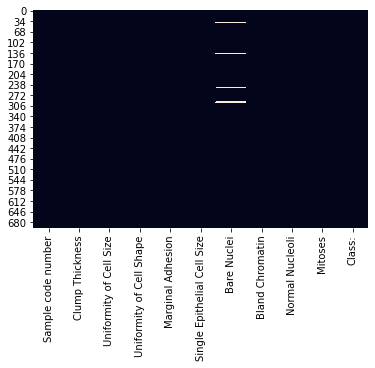

In [7]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(df.isnull(), cbar=False)

Usaremos el método k-NN para imputar los valores perdidos en el atributo KNN. Usamos este método y no otro dado que con este se puede identificar los registros más similares al que presenta los valores nulos y asignarle la media de sus vecinos, produciendo así un valor más parecido al real.

La clase que implementa este método es KNNImputer

In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 3, weights= "uniform")
imputer.fit(df[["Bare Nuclei"]])
df["Bare Nuclei"] = imputer.transform(df[["Bare Nuclei"]]).ravel()

print("Valores perdidos en Bare Nuclei: " + 
      str(df['Bare Nuclei'].isnull().sum()))

Valores perdidos en Bare Nuclei: 0


In [9]:
# Comprobamos que no tenemos valores perdidos
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class:                         0
dtype: int64

In [10]:
# Ahora sí que podemos cambiar el datatype de Bare Nuclei a int64
df['Bare Nuclei']=df['Bare Nuclei'].astype('int64')

Finalmente, para concluir la fase de preprocesado de datos, mostramos de nuevo el datatype de nuestro DataFrame

In [11]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class:                         int64
dtype: object

In [12]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# 2. Estadística descriptiva del dataset

Veamos algunas de las estadísticas básicas del data frame:

## 2.1. Análisis univariante

In [13]:
df = df.drop(['Sample code number'], axis= 1)

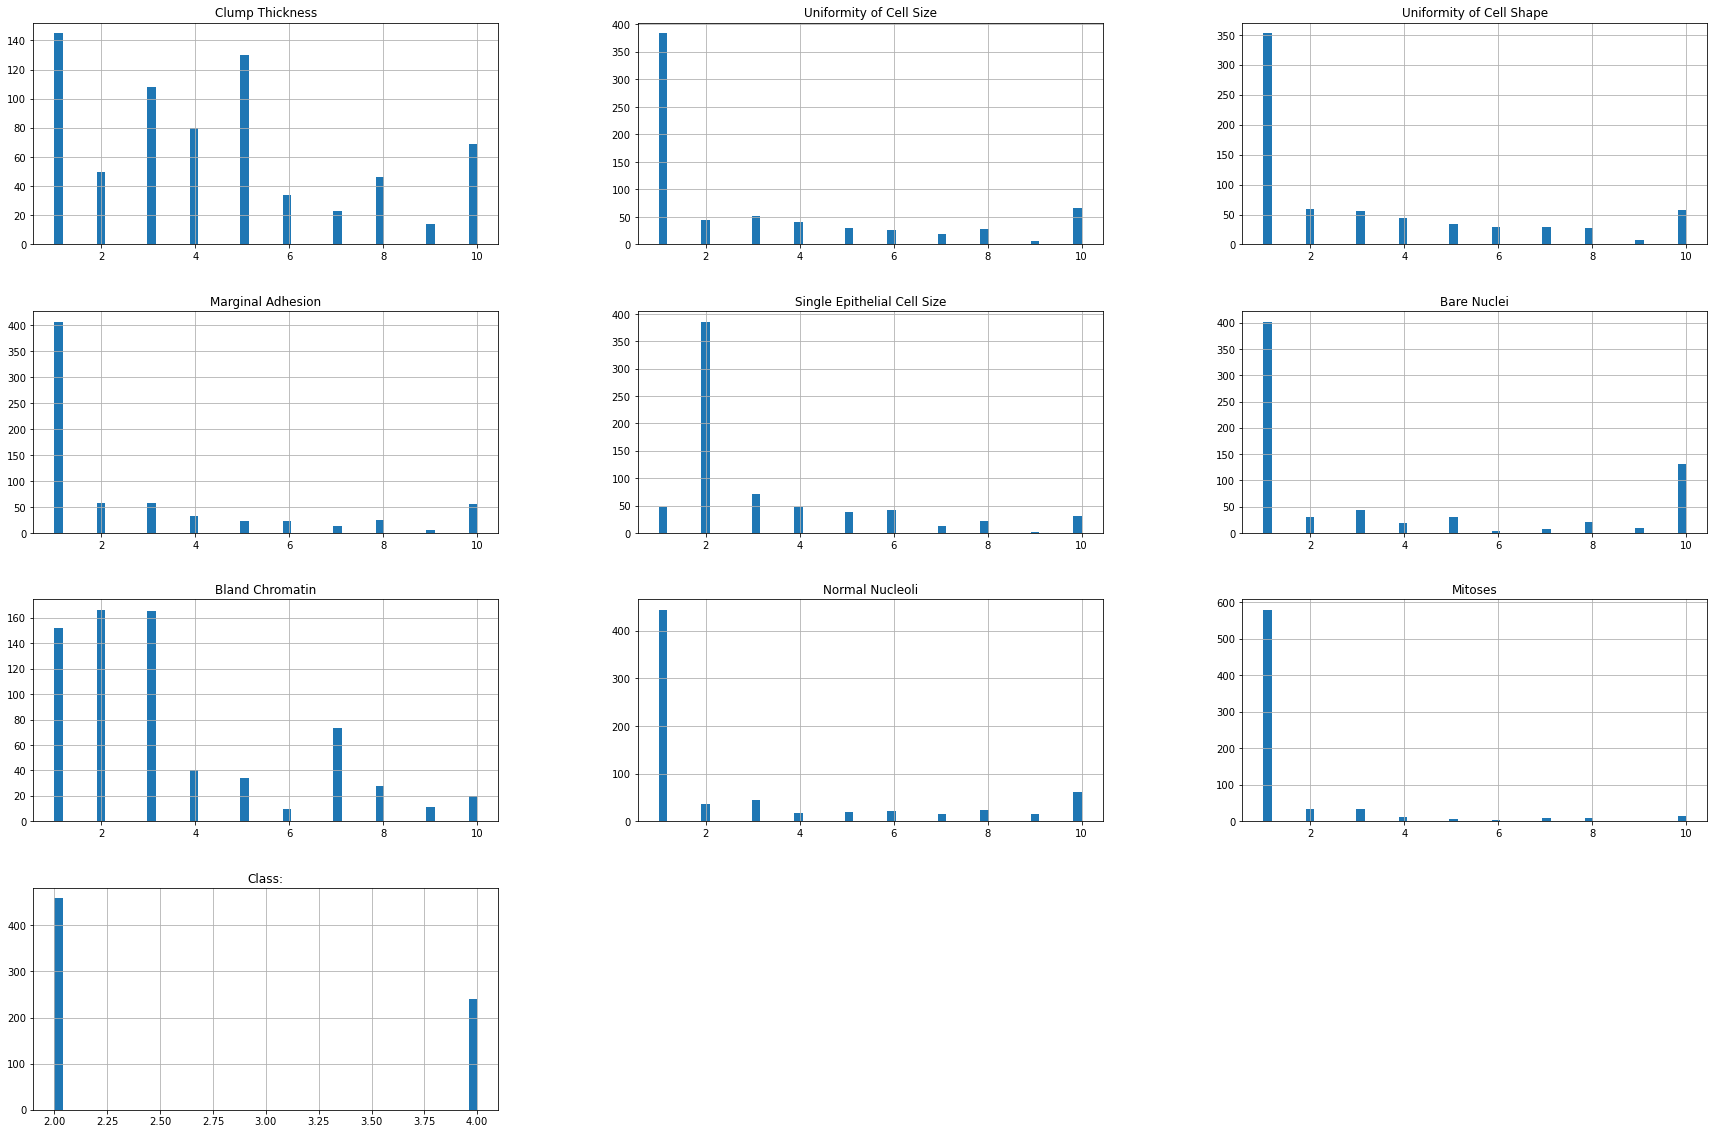

In [14]:
df.hist(bins=50, figsize=(30,20));

### Clump Thickness

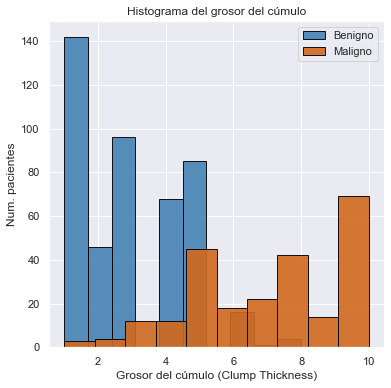

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "darkgrid")

# Histograma del alcohol por clases

plt.figure(figsize=(6,6))
plt.hist(df['Clump Thickness'][df['Class:'] == 2], bins = 10, ec = "black", alpha = 0.9, label = 'Benigno', color = 'steelblue')
plt.hist(df['Clump Thickness'][df['Class:'] == 4], bins = 10, ec = "black", alpha = 0.9, label = 'Maligno', color = 'chocolate')
plt.legend(loc = 'upper right')
plt.title('Histograma del grosor del cúmulo')
plt.ylabel('Num. pacientes')
plt.xlabel('Grosor del cúmulo (Clump Thickness)')
plt.show()

In [16]:
df['ClassCat'] = df['Class:']
df['ClassCat'][df['ClassCat'] == 2] = "Benigno"
df['ClassCat'][df['ClassCat'] == 4] = "Maligno"

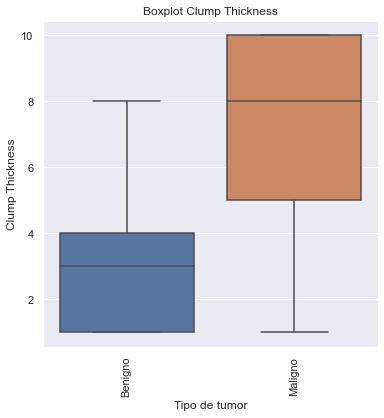

In [17]:
data = pd.concat([df['Clump Thickness'], df['ClassCat']], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x= 'ClassCat', y="Clump Thickness", data=data)
#title('Histograma del grosor del cúmulo')
plt.xlabel('Tipo de tumor')
plt.title("Boxplot Clump Thickness")
plt.xticks(rotation=90);

### Uniformity of Cell Size

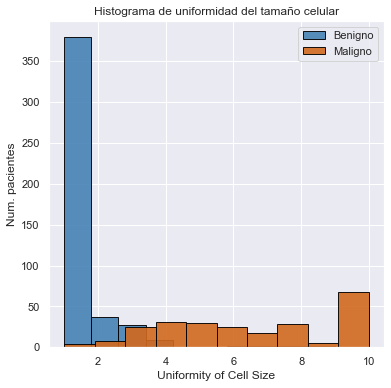

In [18]:
sns.set(style = "darkgrid")

# Histograma del alcohol por clases

plt.figure(figsize=(6,6))
plt.hist(df['Uniformity of Cell Size'][df['Class:'] == 2], bins = 10, ec = "black", alpha = 0.9, label = 'Benigno', color = 'steelblue')
plt.hist(df['Uniformity of Cell Size'][df['Class:'] == 4], bins = 10, ec = "black", alpha = 0.9, label = 'Maligno', color = 'chocolate')
plt.legend(loc = 'upper right')
plt.title('Histograma de uniformidad del tamaño celular')
plt.ylabel('Num. pacientes')
plt.xlabel('Uniformity of Cell Size')
plt.show()

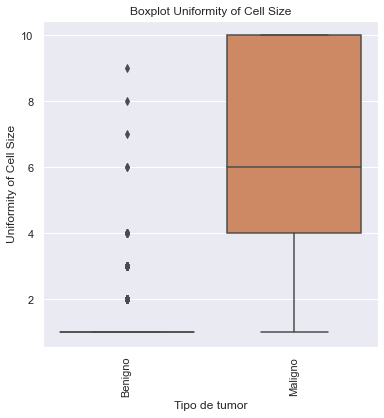

In [19]:
data = pd.concat([df['Uniformity of Cell Size'], df['ClassCat']], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x= 'ClassCat', y="Uniformity of Cell Size", data=data)
#title('Histograma del grosor del cúmulo')
plt.xlabel('Tipo de tumor')
plt.title("Boxplot Uniformity of Cell Size")
plt.xticks(rotation=90);

### Uniformity of Cell Shape

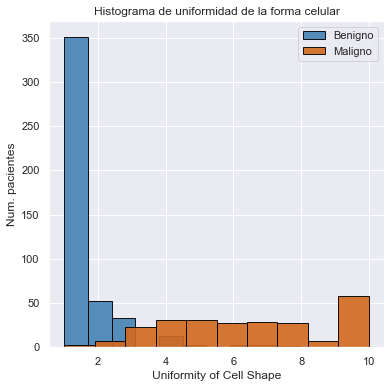

In [20]:
sns.set(style = "darkgrid")

# Histograma del alcohol por clases

plt.figure(figsize=(6,6))
plt.hist(df['Uniformity of Cell Shape'][df['Class:'] == 2], bins = 10, ec = "black", alpha = 0.9, label = 'Benigno', color = 'steelblue')
plt.hist(df['Uniformity of Cell Shape'][df['Class:'] == 4], bins = 10, ec = "black", alpha = 0.9, label = 'Maligno', color = 'chocolate')
plt.legend(loc = 'upper right')
plt.title('Histograma de uniformidad de la forma celular')
plt.ylabel('Num. pacientes')
plt.xlabel('Uniformity of Cell Shape')
plt.show()

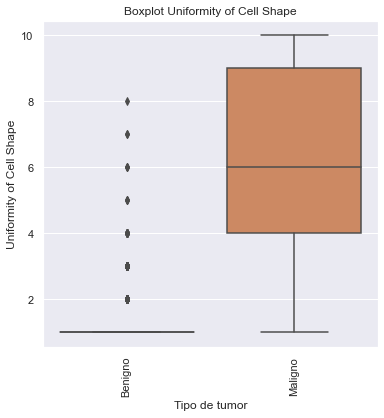

In [21]:
data = pd.concat([df['Uniformity of Cell Shape'], df['ClassCat']], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x= 'ClassCat', y="Uniformity of Cell Shape", data=data)
#title('Histograma del grosor del cúmulo')
plt.xlabel('Tipo de tumor')
plt.title("Boxplot Uniformity of Cell Shape")
plt.xticks(rotation=90);

### Marginal Adhesion

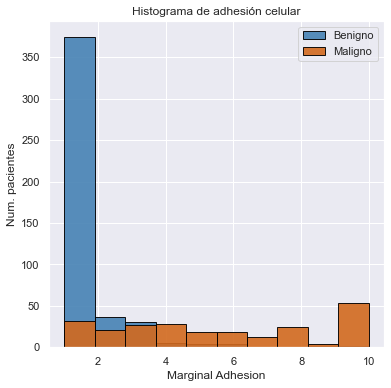

In [22]:
sns.set(style = "darkgrid")

# Histograma del alcohol por clases

plt.figure(figsize=(6,6))
plt.hist(df['Marginal Adhesion'][df['Class:'] == 2], bins = 10, ec = "black", alpha = 0.9, label = 'Benigno', color = 'steelblue')
plt.hist(df['Marginal Adhesion'][df['Class:'] == 4], bins = 10, ec = "black", alpha = 0.9, label = 'Maligno', color = 'chocolate')
plt.legend(loc = 'upper right')
plt.title('Histograma de adhesión celular')
plt.ylabel('Num. pacientes')
plt.xlabel('Marginal Adhesion')
plt.show()

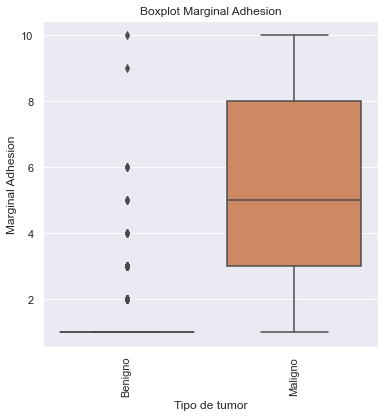

In [23]:
data = pd.concat([df['Marginal Adhesion'], df['ClassCat']], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x= 'ClassCat', y="Marginal Adhesion", data=data)
#title('Histograma del grosor del cúmulo')
plt.xlabel('Tipo de tumor')
plt.title("Boxplot Marginal Adhesion")
plt.xticks(rotation=90);

### Single Epithelial Cell Size

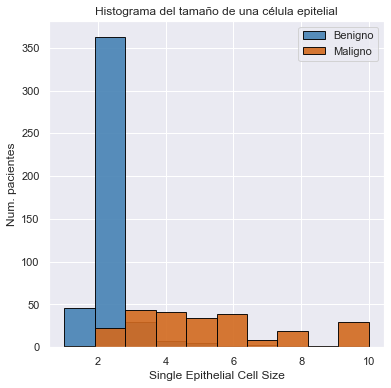

In [24]:
sns.set(style = "darkgrid")

# Histograma del alcohol por clases

plt.figure(figsize=(6,6))
plt.hist(df['Single Epithelial Cell Size'][df['Class:'] == 2], bins = 10, ec = "black", alpha = 0.9, label = 'Benigno', color = 'steelblue')
plt.hist(df['Single Epithelial Cell Size'][df['Class:'] == 4], bins = 10, ec = "black", alpha = 0.9, label = 'Maligno', color = 'chocolate')
plt.legend(loc = 'upper right')
plt.title('Histograma del tamaño de una célula epitelial')
plt.ylabel('Num. pacientes')
plt.xlabel('Single Epithelial Cell Size')
plt.show()

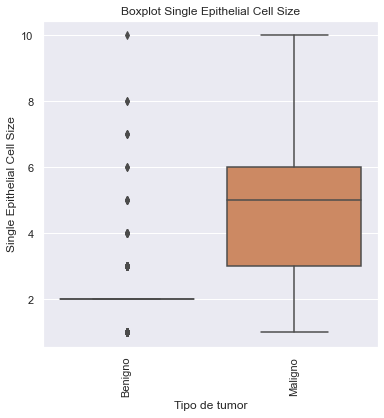

In [25]:
data = pd.concat([df['Single Epithelial Cell Size'], df['ClassCat']], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x= 'ClassCat', y="Single Epithelial Cell Size", data=data)
#title('Histograma del grosor del cúmulo')
plt.xlabel('Tipo de tumor')
plt.title("Boxplot Single Epithelial Cell Size")
plt.xticks(rotation=90);

### Bare Nuclei

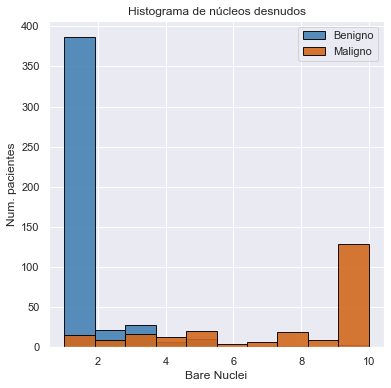

In [26]:
sns.set(style = "darkgrid")

# Histograma del alcohol por clases

plt.figure(figsize=(6,6))
plt.hist(df['Bare Nuclei'][df['Class:'] == 2], bins = 10, ec = "black", alpha = 0.9, label = 'Benigno', color = 'steelblue')
plt.hist(df['Bare Nuclei'][df['Class:'] == 4], bins = 10, ec = "black", alpha = 0.9, label = 'Maligno', color = 'chocolate')
plt.legend(loc = 'upper right')
plt.title('Histograma de núcleos desnudos')
plt.ylabel('Num. pacientes')
plt.xlabel('Bare Nuclei')
plt.show()

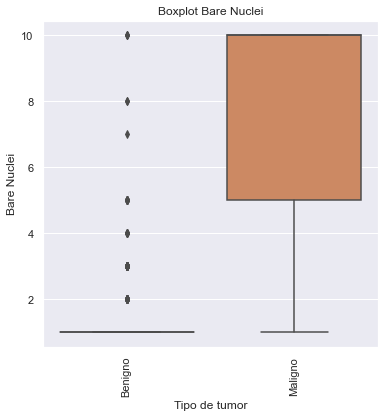

In [27]:
data = pd.concat([df['Bare Nuclei'], df['ClassCat']], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x= 'ClassCat', y="Bare Nuclei", data=data)
#title('Histograma del grosor del cúmulo')
plt.xlabel('Tipo de tumor')
plt.title("Boxplot Bare Nuclei")
plt.xticks(rotation=90);

### Bland Chromatin

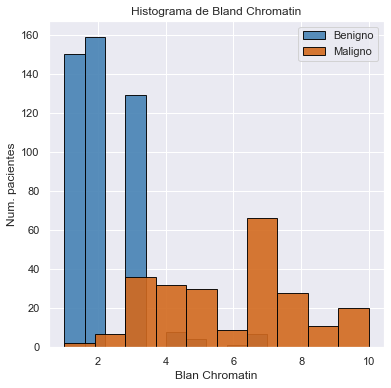

In [28]:
sns.set(style = "darkgrid")

# Histograma del alcohol por clases

plt.figure(figsize=(6,6))
plt.hist(df['Bland Chromatin'][df['Class:'] == 2], bins = 10, ec = "black", alpha = 0.9, label = 'Benigno', color = 'steelblue')
plt.hist(df['Bland Chromatin'][df['Class:'] == 4], bins = 10, ec = "black", alpha = 0.9, label = 'Maligno', color = 'chocolate')
plt.legend(loc = 'upper right')
plt.title('Histograma de Bland Chromatin')
plt.ylabel('Num. pacientes')
plt.xlabel('Blan Chromatin')
plt.show()

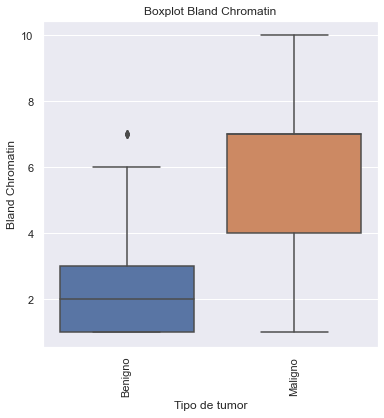

In [29]:
data = pd.concat([df['Bland Chromatin'], df['ClassCat']], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x= 'ClassCat', y="Bland Chromatin", data=data)
#title('Histograma del grosor del cúmulo')
plt.xlabel('Tipo de tumor')
plt.title("Boxplot Bland Chromatin")
plt.xticks(rotation=90);

### Normal Nucleoli

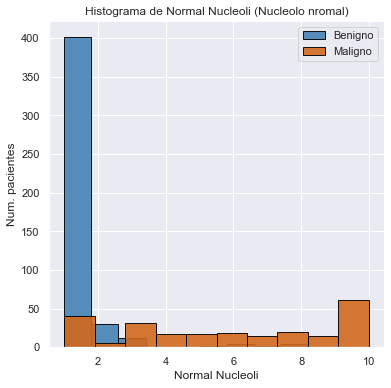

In [30]:
sns.set(style = "darkgrid")

# Histograma del alcohol por clases

plt.figure(figsize=(6,6))
plt.hist(df['Normal Nucleoli'][df['Class:'] == 2], bins = 10, ec = "black", alpha = 0.9, label = 'Benigno', color = 'steelblue')
plt.hist(df['Normal Nucleoli'][df['Class:'] == 4], bins = 10, ec = "black", alpha = 0.9, label = 'Maligno', color = 'chocolate')
plt.legend(loc = 'upper right')
plt.title('Histograma de Normal Nucleoli (Nucleolo nromal)')
plt.ylabel('Num. pacientes')
plt.xlabel('Normal Nucleoli')
plt.show()

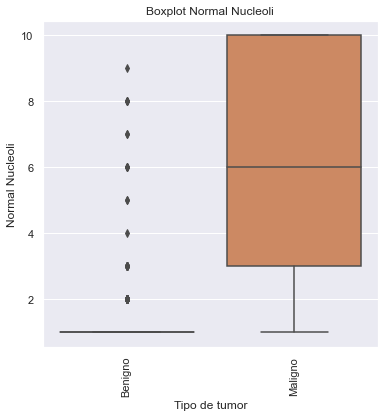

In [31]:
data = pd.concat([df['Normal Nucleoli'], df['ClassCat']], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x= 'ClassCat', y="Normal Nucleoli", data=data)
#title('Histograma del grosor del cúmulo')
plt.xlabel('Tipo de tumor')
plt.title("Boxplot Normal Nucleoli")
plt.xticks(rotation=90);

### Mitoses

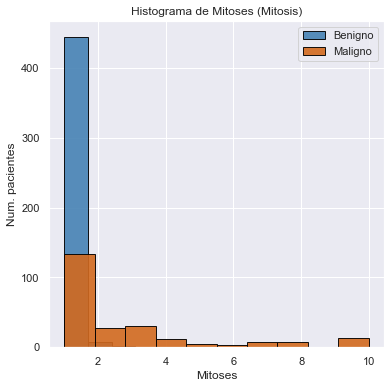

In [32]:
sns.set(style = "darkgrid")

# Histograma del alcohol por clases

plt.figure(figsize=(6,6))
plt.hist(df['Mitoses'][df['Class:'] == 2], bins = 10, ec = "black", alpha = 0.9, label = 'Benigno', color = 'steelblue')
plt.hist(df['Mitoses'][df['Class:'] == 4], bins = 10, ec = "black", alpha = 0.9, label = 'Maligno', color = 'chocolate')
plt.legend(loc = 'upper right')
plt.title('Histograma de Mitoses (Mitosis)')
plt.ylabel('Num. pacientes')
plt.xlabel('Mitoses')
plt.show()

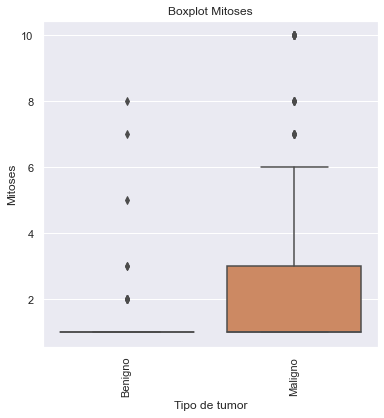

In [33]:
data = pd.concat([df['Mitoses'], df['ClassCat']], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x= 'ClassCat', y="Mitoses", data=data)
#title('Histograma del grosor del cúmulo')
plt.xlabel('Tipo de tumor')
plt.title("Boxplot Mitoses")
plt.xticks(rotation=90);

## 2.2. Correlación entre variables

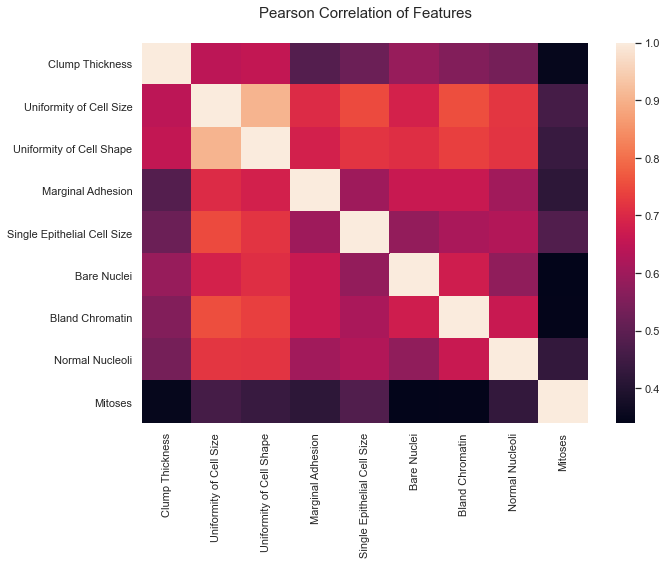

In [96]:
import matplotlib.pyplot as plt

df_features = df.drop(['Class:'], axis= 1)
df_features = df.drop(['ClassCat'], axis= 1)

correlation_matrix = df_features.drop(['Class:'], axis= 1).corr()
correlation_matrix

plt.figure(figsize=(10,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix);

In [92]:
df_features.drop(['Class:'], axis= 1).corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.588433,0.558428,0.535835,0.350034
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.687417,0.755721,0.722865,0.458693
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709812,0.735948,0.719446,0.438911
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666086,0.666715,0.603352,0.417633
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.582331,0.616102,0.628881,0.479101
Bare Nuclei,0.588433,0.687417,0.709812,0.666086,0.582331,1.000000,0.676167,0.577347,0.339844
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.676167,1.000000,0.665878,0.344169
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.577347,0.665878,1.000000,0.428336
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339844,0.344169,0.428336,1.000000


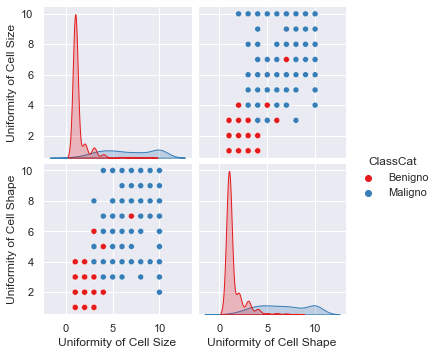

In [35]:
import seaborn as sns

df['ClassCat'] = df['Class:']
df['ClassCat'][df['ClassCat'] == 2] = "Benigno"
df['ClassCat'][df['ClassCat'] == 4] = "Maligno"

# Seleccionamos las variables que muestran mayor correlación en base al mapa
feats_to_explore = ['Uniformity of Cell Size', 'Uniformity of Cell Shape']
feats_to_explore.append("ClassCat")

# Relaciones entre variables
scatter = sns.pairplot(df[feats_to_explore], hue="ClassCat", palette = "Set1")

In [36]:
df_features = df.drop(['Class:'], axis= 1)
df_features = df.drop(['ClassCat'], axis= 1)

Según los scatter plots (gráficos de dispersión), se muestra una notable correspondencvia entre las variables *Uniformity of Cell Size* y *Uniformity of Cell Shape*, de manrra que para pequeños valores de ambos campos, el tipo de tumor se clasifica como benigno (*Class: 2*). Contrariamente, es cuando los valores de Uniformidad del tamaño y forma celular aumenta cuando el tumor es clasificado como maligno (*Class: 4*).

Esto es aún una explicación muy vasta teniendo en cuenta el resto de variables que no se han considerado en estos gráficos, pero en primera aproximación sí que nos puede aportar cierta información cuantitativa y cualitativa a tener en cuenta durante los posteriores procesos.

## 2.3. Variables numéricas

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.532189,3.602774,1.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class:,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# 3. Reducción de la dimensionalidad

En esta sección aplicaremos diferentes técnicas de reducciónn de la dimensionalidad, de manera que al conjunto de datos resultante de cada reducción le aplicaremos los siguientes técnicas de clasificación:

- Decision Tree
- K-NN
- Naive-Bayes
- Support Vector Machine (SVM)

## 3.1. PCA

In [38]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [39]:
df_features = df_features.drop(['Class:'], axis= 1)


In [40]:
# Entrenamiento modelo PCA con escalado de los datos
# df2 = df.drop(['Class:'], axis= 1)
target = df['Class:']
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_features)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [41]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_features.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
PC1,0.302678,0.381196,0.377673,0.332737,0.336271,0.333625,0.346042,0.335960,0.229622
PC2,-0.143261,-0.048512,-0.084914,-0.044090,0.165500,-0.252704,-0.229605,0.024830,0.907405
PC3,-0.862723,0.016070,-0.037145,0.424392,0.106954,0.006415,0.195825,0.126740,-0.089841
PC4,-0.100141,0.203240,0.172511,-0.467629,0.389244,-0.534538,-0.010814,0.449607,-0.246419
PC5,-0.064845,0.137018,0.104354,-0.017277,0.672914,0.123534,-0.251726,-0.646473,-0.128320
PC6,0.273077,0.093306,0.017538,0.682160,-0.036303,-0.587818,-0.286213,-0.032758,-0.145718
PC7,-0.003780,0.206545,0.129193,-0.098326,-0.179372,-0.407808,0.690118,-0.490520,0.124948
PC8,0.233989,-0.448119,-0.589521,0.104967,0.453585,-0.078150,0.404915,0.091383,-0.041617
PC9,0.001263,0.734724,-0.666026,-0.047217,-0.067360,0.076535,-0.059739,0.018541,-0.007164


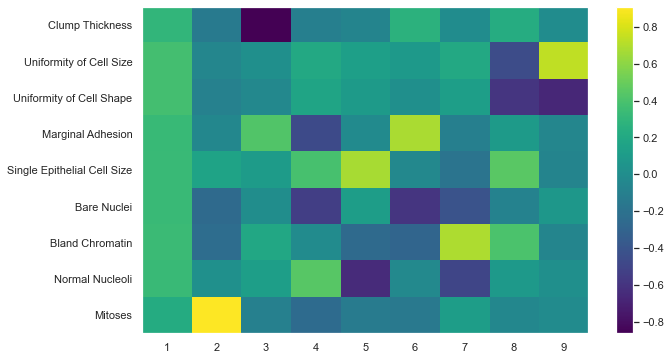

In [42]:
# Heatmap componentes
import numpy as np
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_features.columns)), df_features.columns)
plt.xticks(range(len(df_features.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.65452271 0.08624694 0.0598705  0.05146557 0.04221177 0.03388566
 0.03280298 0.02914022 0.00985366]


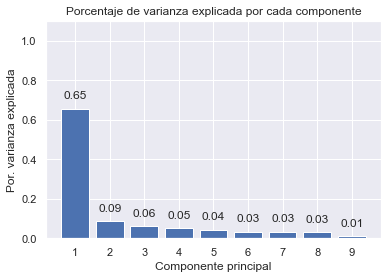

In [43]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_features.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.65452271 0.74076965 0.80064014 0.85210572 0.89431748 0.92820314
 0.96100612 0.99014634 1.        ]


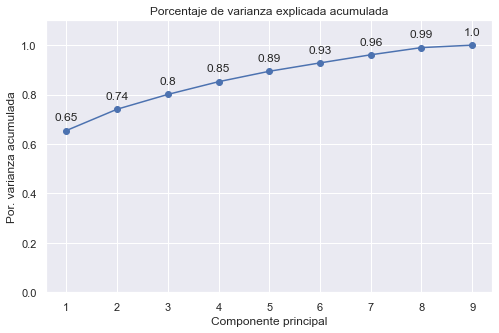

In [44]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax.plot(
    np.arange(len(df_features.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_features.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Observando la gráfica sabemos que con las 6 primeras componentes principales seríamos capaces de explicar el 93% de los datos

### Transformación

Hasta ahora lo que hemos hecho ha sido reducir el modelo, así que a continuación debemos reducir la dimensionalidad de las nuevas observaciones, proyectándolas en el espacio definido por las componentes

In [45]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df_features)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'],
    index   = df_features.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.461774,-0.103874,-0.576030,-0.021431,-0.147766,0.101153,0.339433,0.425170,-0.004045
1,1.465206,-0.548800,0.296450,-0.612133,1.685755,-0.395267,-1.050227,0.395459,0.025004
2,-1.584250,-0.072235,0.038977,-0.098725,-0.067361,-0.256224,0.228845,0.237143,0.016316
3,1.501654,-0.553258,-0.630416,1.430705,-0.474396,-0.116901,-0.268628,-1.590373,0.182978
4,-1.336120,-0.083863,0.028054,-0.313618,-0.136830,0.482250,0.271856,0.415584,-0.037590


In [46]:
df['ClassCat'] = df['Class:']
df['ClassCat'][df['ClassCat'] == 2] = "Benigno"
df['ClassCat'][df['ClassCat'] == 4] = "Maligno"

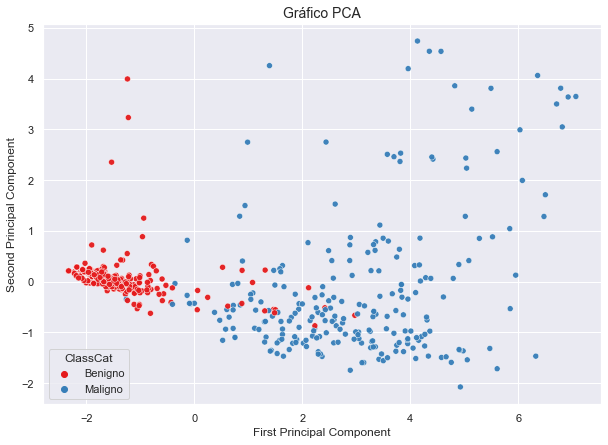

In [47]:
# Generamos gráfico 2D
plt.figure(figsize = (10, 7))
p = sns.scatterplot(
    x = proyecciones.PC1, y = proyecciones.PC2,
    hue = df['ClassCat'],
    palette = "Set1",
    data = df_features,
    legend = "full",
    alpha = 0.95)

p.set_title('Gráfico PCA', size=14)
p.set_ylabel('Second Principal Component')
p.set_xlabel('First Principal Component')
plt.show()

In [48]:
df_features = df.drop(['ClassCat'], axis= 1)

## Entrenamiento y test

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

X_pca = proyecciones[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]

# Separamos los datos entre el conjunto de test y train
train_X, test_X, train_y, test_y = train_test_split(X_pca, target, test_size = 0.3)

## 3.1.1. Decision Tree

### Optimización de parámetros

Best cross-validation score: 0.9652805544448887
Best parameters:  {'max_depth': 4, 'min_samples_split': 50}
Heatmap Decision Tree
                        mean_test_score                                \
param_min_samples_split             2         10        20        50    
param_max_depth                                                         
4                              0.955035  0.959183  0.957134  0.965281   
5                              0.957100  0.950986  0.957134  0.963231   
6                              0.948904  0.955085  0.955085  0.963231   
7                              0.953002  0.950986  0.957134  0.963231   
8                              0.959133  0.950986  0.955085  0.963231   
9                              0.952985  0.953035  0.957134  0.963231   
10                             0.959150  0.950986  0.955085  0.963231   

                                  std_test_score                      \
param_min_samples_split       100            2         10        20

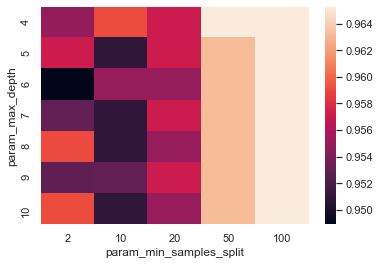

In [50]:
from sklearn.model_selection import GridSearchCV

# Creamos el modelo
DecisionTree_model = DecisionTreeClassifier()

# Valores parámetro de profundidad máxima
max_depths = np.arange(4,11)

# Valores numero minimo de observaciones de una hoja de arbol
min_samples_split = [2, 10, 20, 50, 100]

# Agrupamos la rejilla que integrará todas las combinaciones posibles de hiperparámetros
param_grid = {'max_depth': max_depths, 'min_samples_split': min_samples_split}

# Entrenamos modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
grid_DT = GridSearchCV(estimator = DecisionTree_model,
                    param_grid = param_grid,
                    cv = 4,
                    return_train_score= True)

# Entrenamos los modelos
grid_DT.fit(train_X, train_y)

# Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado
print("Best cross-validation score:", grid_DT.best_score_)
print("Best parameters: ", grid_DT.best_params_)

# Representamos el heatmap creando un dataframe
print("Heatmap Decision Tree")
pvt_DT = pd.pivot_table(pd.DataFrame(grid_DT.cv_results_),
                     values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')
heatm_DT = sns.heatmap(pvt_DT)



print(pd.pivot_table(pd.DataFrame(grid_DT.cv_results_),
                     values=['mean_test_score','std_test_score'], index='param_max_depth', columns='param_min_samples_split'))

### Implementación

In [51]:
# Definimos el modelo con max_depth =4
model_pca = DecisionTreeClassifier(max_depth = 4,  min_samples_split = 100).fit(train_X, train_y)

# Aplicamos validación cruzada

cross_val_pca = cross_val_score(estimator = model_pca, X = train_X, y = train_y, cv = 5)

print('Validación cruzada: {}'.format(cross_val_pca))
print('La media de la validación cruzada es: {0: .3f}'.format(np.mean(cross_val_pca)))
print('La desviación estándar de la validación cruzada es: {0: .3f}'.format(np.std(cross_val_pca)))

Validación cruzada: [0.93877551 0.98979592 0.93877551 0.97959184 0.97938144]
La media de la validación cruzada es:  0.965
La desviación estándar de la validación cruzada es:  0.022


### Evaluación

Precisión obtenida: 0.9809523809523809


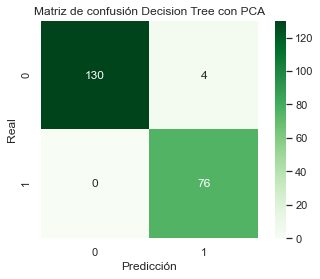

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score


# Generamos predicciones
predicted = model_pca.predict(test_X)


# Generamos la matriz de confusión y calculamos la precisión
matrix = confusion_matrix(test_y, predicted)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted)))
sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión Decision Tree con PCA")
plt.show()

## 3.1.2. KNN

El objetivo es entender el funcionamiento del KNN, intuir sus principales ventajas o desventajas y entender la influencia de los parámetros de los que está compuesto.

K-Nearest-Neighbor es un algoritmo basado en instancia de tipo supervisado. 

Vamos a ver qué significa esto:

  - Supervisado: tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado.
  - Basado en instancia (_Lazy Learning_): Esto significa que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión), sino que memoriza las instancias de entrenamiento que son utilizadas como "conocimiento" para la fase de predicción.

¿Cómo funciona KNN?

  - Calculamos la distancia entre el ítem a clasificar y los demás ítems del dataset de entrenamiento.
  - Seleccionamos los "k" elementos más cercanos, es decir, con menor distancia, según la distancia que utilizamos (euclídea, coseno, manhattan, etc).
  - Por último realizamos una "votación de mayoría" entre los k puntos: los de la clase que "dominan" decidirán su clasificación final.

**Ajuste de parámetros**

Uno de los parámetros que debemos ajustar en este modelo es el *n_neighbors*.

Para conocer el valor óptimo de los parámetros de un modelo (_hyperparameter tunning_) haremos uso de una búsqueda de rejilla (_grid search_). Es decir, entrenar un modelo para cada combinación de hiperparámetros posible y evaluarlo utilizando validación cruzada (_cross validation_) con 4 particiones estratificadas. Posteriormente, se elige la combinación de hiperparàmetres que mejores resultados haya obtenido.

En este caso sólo vamos a optimizar un hiperparámetro *n_neighbors*:

   - 𝑘: el número de vecinos que se consideran para clasificar un nuevo ejemplo. Probaremos con todos los valores entre 1 y 10.

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score

X_pca = proyecciones[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]

# Separamos los datos entre el conjunto de test y train
train_X, test_X, train_y, test_y = train_test_split(X_pca, target, test_size = 0.3)


### Optimización de parámetros

Best cross-validation score: 0.9693455950952952
Best parameter :  {'n_neighbors': 9}
Heatmap k-nn.
                   mean_test_score  std_test_score
param_n_neighbors                                 
1                         0.967246        0.015370
2                         0.944739        0.021268
3                         0.965231        0.006817
4                         0.961132        0.003665
5                         0.969329        0.006777
6                         0.967280        0.005797
7                         0.967280        0.010040
8                         0.969329        0.006777
9                         0.969346        0.015686
10                        0.969329        0.012112


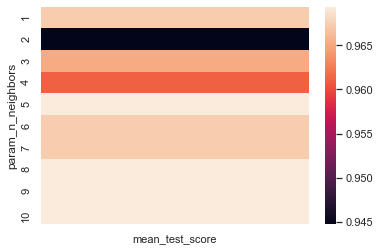

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Creamos el modelo
kNN_model = KNeighborsClassifier()
# Array con los valores para el número de vecinos, entre 1 y 10
ks = np.array(range(1,11))

# Agrupamos la "rejilla" que integrará todas las combinaciones posibles de hiperparámetros
param_grid = {'n_neighbors': ks}
# Entrenamos un modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
grid = GridSearchCV(estimator = kNN_model,
                    param_grid = param_grid,
                    cv = 4,
                    return_train_score=True)

# Entrenamos modelo
grid.fit(train_X, train_y)
# Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado

print("Best cross-validation score:", grid.best_score_)
print("Best parameter : ", grid.best_params_)
# Representamos el heatmap creando un dataframe
print("Heatmap k-nn.")
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
                     values='mean_test_score', index='param_n_neighbors')

heatm = sns.heatmap(pvt)

print(pd.pivot_table(pd.DataFrame(grid.cv_results_),
                     values=['mean_test_score','std_test_score'], index='param_n_neighbors'))

### Implementación

Como podemos observar, el mejor hiperparámetro obtenido para n_neighbors es k = 3.

In [55]:
# Elegimos el mejor hiperparámetro encontrado: 3
knn = KNeighborsClassifier(n_neighbors = 3)

# Entrenamos el modelo
knn.fit(train_X, train_y)

# Realizamos una predicción
predicted_KNN =knn.predict(test_X)

### Evaluación

Precisión obtenida: 0.9476190476190476


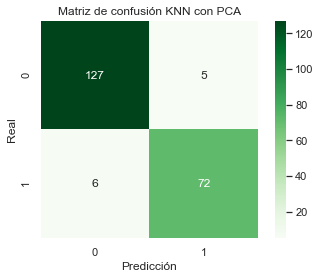

In [56]:
# Generamos la matriz de confusión y calculamos la precisión
matrix = confusion_matrix(test_y, predicted_KNN)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted_KNN)))
sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión KNN con PCA")
plt.show()

## 3.1.3. Naive Bayes

Algoritmo peculiar ya que se basa completamente en teoría de probabilidades. Utilizaremos el clasificador *GaussianNB* de *sklearn*

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score


X_pca = proyecciones[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]

# Separamos los datos entre el conjunto de test y train
train_X, test_X, train_y, test_y = train_test_split(X_pca, target, test_size = 0.3)


### Implementación

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()

# Entrenamos el modelo
gnb.fit(train_X, train_y)

# Realizamos una predicción
predicted_NB =gnb.predict(test_X)

### Evaluación

Precisión obtenida: 0.9666666666666667


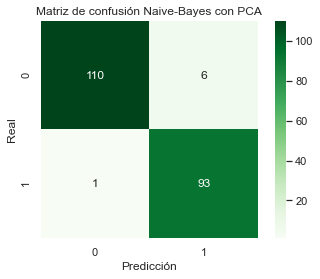

In [59]:
# Generamos la matriz de confusión y calculamos la precisión
matrix = confusion_matrix(test_y, predicted_NB)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted_NB)))
sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
plt.xlabel("Predicción")
plt.title("Matriz de confusión Naive-Bayes con PCA")
plt.ylabel("Real")
plt.show()

## 3.1.4. SVM

Las Support Vector Machine se fundamentan en el _Máximal Margin Classifier_, que a su vez, se basan en el concepto de hiperplano.

En un espacio p-dimensional, un hiperplano se define como un subespacio plano y afín de dimensiones p-1. El término afín significa que el subespacio no debe pasar por el origen. En un espacio de dos dimensiones, el hiperplano es un subespacio de 1 dimensión, es decir, una recta. En un espacio tridimensional, un hiperplano es un subespacio de dos dimensiones, un plano convencional. Para dimensiones p>3 no es intuitivo visualizar un hiperplano, pero el concepto de subespacio con p-1 dimensiones se mantiene.

La definición de hiperplano para casos perfectamente separables linealmente resulta en un número infinito de posibles hiperplanos, lo que hace necesario un método que permita seleccionar uno de ellos como clasificador óptimo.

La solución a este problema consiste en seleccionar como clasificador óptimo al que se conoce como _maximal margin hyperplane_ o hiperplano óptimo de separación, que se corresponde con el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. Para obtenerlo, se debe calcular la distancia perpendicular de cada observación a un determinado hiperplano. La menor de estas distancias (conocida como margen) determina cómo de lejos está el hiperplano de las observaciones de entrenamiento. El _maximal margin hyperplane_ se define como el hiperplano que consigue un mayor margen, es decir, que la distancia mínima entre el hiperplano y las observaciones es lo más grande posible. Aunque esta idea suena razonable, no es posible aplicarla, ya que habría infinitos hiperplanos contra los que medir las distancias. En su lugar, se recurre a métodos de optimización.

El proceso de optimización tiene la peculiaridad de que sólo las observaciones que se encuentran justo al margen o que lo violan influyen sobre el hiperplano. A estas observaciones se les conoce como vectores soporte (_vectors suport_) y son las que definen el clasificador obtenido.

Al igual que en el algoritmo visto anteriormente (KNN), las SVM también dependen de varios hiperparámetros. 

En este caso intentaremos optimizar dos hiperparámetros:

  - C: es la regularización, es decir, el valor de penalización de los errores en la clasificación. Indica el compromiso entre obtener el hiperplano con el margen más grande posible y clasificar el máximo número de ejemplos correctamente. Probaremos los valores: 0.01, 0.1, 1, 10, 50, 100 y 200.
  
  - gama: coeficiente que multiplica la distancia entre dos puntos en el kernel radial. Para decirlo a "grosso modo", cuanto más pequeño es gama, más influencia tienen dos puntos cercanos. Probaremos los valores: 0.001, 0.01, 0.1, 1 y 10.

### Optimización de parámetros

Best cross-validation score: 0.9673130747700919
Best parameters:  {'C': 1, 'gamma': 0.01}
Heatmap SVM. Kernel radial
            mean_test_score                               std_test_score  \
param_gamma          0.001     0.010     1.000     10.000         0.001    
param_C                                                                    
0.01               0.699387  0.699387  0.699387  0.699387       0.003348   
0.10               0.699387  0.965247  0.936625  0.699387       0.003348   
1.00               0.963198  0.967313  0.948870  0.889544       0.012268   
10.00              0.967313  0.967313  0.952969  0.893643       0.011451   
50.00              0.965281  0.961166  0.952969  0.893643       0.015573   
100.00             0.965281  0.959116  0.952969  0.893643       0.015573   
200.00             0.965264  0.957067  0.952969  0.893643       0.010514   

                                           
param_gamma    0.010     1.000     10.000  
param_C                           

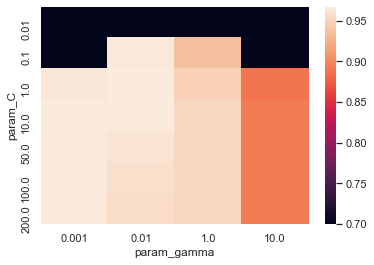

In [60]:
from sklearn.svm import SVC
# Radial
# Creamos el modelo
SVC_model_radial = SVC()

# Valores para el parámetro de regularización C
Cs = [0.01, 0.1, 1, 10, 50, 100, 200]
 
# Valores para el coeficiente gamma
gammas = [0.001, 0.01, 1, 10]

# Agrupamos la "rejilla" que integrará todas las combinaciones posibles de hiperparámetros
param_grid = {'C': Cs, 'gamma': gammas}
#Entrenamos un modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
grid_radial = GridSearchCV(estimator = SVC_model_radial,
                    param_grid = param_grid,
                    cv = 4,
                    return_train_score=True)

# Entrenamos los modelos
grid_radial.fit(train_X, train_y)

# Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado
print("Best cross-validation score:", grid_radial.best_score_)
print("Best parameters: ", grid_radial.best_params_)

# Representamos el heatmap creando un dataframe
print("Heatmap SVM. Kernel radial")
pvt_radial = pd.pivot_table(pd.DataFrame(grid_radial.cv_results_),
                     values='mean_test_score', index='param_C', columns='param_gamma')
heatm_radial = sns.heatmap(pvt_radial)



print(pd.pivot_table(pd.DataFrame(grid_radial.cv_results_),
                     values=['mean_test_score','std_test_score'], index='param_C', columns='param_gamma'))

### Implementación

In [61]:
# Elaboramos el mejor modelo obtenido en el ajuste de kernel radial
SVC_model_radial_fit = SVC(kernel = 'rbf', C = 10, gamma = 0.01)

# Entrenamos el modelo
SVC_model_radial_fit.fit(train_X, train_y)

# Realizamos una predicción
predicted_SVM= SVC_model_radial_fit.predict(test_X)

### Evaluación

Precisión obtenida: 0.9714285714285714


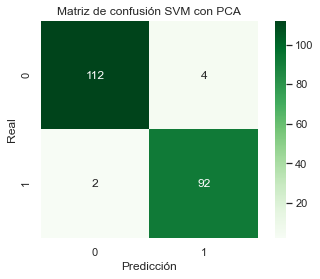

In [62]:
# Generamos la matriz de confusión y calculamos la precisión
matrix = confusion_matrix(test_y, predicted_SVM)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted_SVM)))
sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión SVM con PCA")
plt.show()

## 3.2. T-SNE (t- Distributed Stochastic Neighbor Embedding)

Este método de reducción de la dimensionalidad, en teoría, funciona mejor para datasets con un número notable de dimensiones, por lo que, en principio, es más efectivo que PCA.

El objetivo es tomar un conjunto de puntos en un espacio de n-dimensional y encontrar una representación fiel de esos puntos en un espacio de menor dimensión, normalmente el plano 2D. El algoritmo no es lineal y se adapta a los datos subyacentes, realizando diferentes transformaciones en diferentes regiones. Esas diferencias pueden ser una fuente importante de confusión.

Una segunda característica de t-SNE es un parámetro ajustable, la "perplejidad" (*perplexity*), que indica, a grandes rasgos, cómo equilibrar la atención entre los aspectos locales y globales de los datos. El parámetro es, en cierto sentido, una suposición sobre el número de vecinos cercanos que tiene cada punto. El valor de la perplejidad tiene un efecto complejo en el conjunto resultante. Los valores típicos de este parámetro suelen estar entre 5 y 50. Pero la historia es algo más matizada que eso. Sacar el máximo provecho de t-SNE puede significar analizar múltiples representaciones con diferentes valores de la perplejidad.

Aquí no acaban las complicaciones. Por ejemplo, el algoritmo t-SNE no siempre produce resultados similares en ejecuciones sucesivas, y hay hiperparámetros adicionales relacionados con el proceso de optimización.

El algoritmo t-SNE adapta su noción de "distancia" a las variaciones regionales de densidad en el conjunto de datos. Como resultado, amplía de forma natural los clusters densos y contrae los más dispersos, igualando el tamaño de los clusters. Se trata de un efecto diferente al hecho habitual de que cualquier técnica de reducción de la dimensionalidad distorsiona las distancias

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 699 samples in 0.003s...
[t-SNE] Computed neighbors for 699 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 699 / 699
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.028229
[t-SNE] KL divergence after 2600 iterations: 0.630348


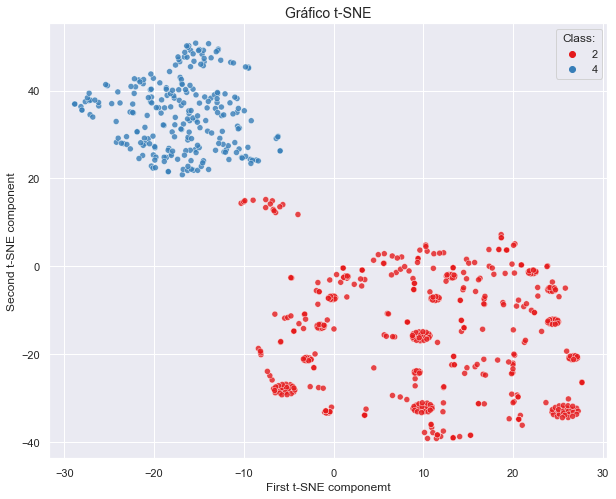

In [63]:
from sklearn.manifold import TSNE

# Preparamos nuestros datos normalizándolos
scal = StandardScaler()
scal.fit(df_features) 
X_scaled = scal.transform(df_features)


# Realizamos el análisis utilizando t-sne
breast_tsne = TSNE(n_components = 2, verbose = 1, perplexity = 25, n_iter = 3000)
breast_tsne_res = breast_tsne.fit_transform(X_scaled)

# Diferenciamos componentes
tsne_1 = breast_tsne_res[:,0]
tsne_2 = breast_tsne_res[:,1]

# Representamos 
plt.figure(figsize = (10, 8))
rep = sns.scatterplot(x = tsne_1, y = tsne_2, hue = target,
                     palette = "Set1", data = X_scaled, legend = "full",
                     alpha = 0.8)
rep.set_title("Gráfico t-SNE", size = 14)
rep.set_ylabel("Second t-SNE component")
rep.set_xlabel("First t-SNE componemt")
plt.show()

## Entrenamiento y test

In [64]:
# Recuperamos la información del TSNE
X_tsne = breast_tsne_res[:,[0,1]]
# Separamos los datos entre el conjunto de test y train
train_X, test_X, train_y, test_y = train_test_split(X_tsne, target, test_size = 0.3)

# 3.2.1. Decision tree

### Optimización de parámetros

Best cross-validation score: 1.0
Best parameters:  {'max_depth': 4, 'min_samples_split': 2}
Heatmap Decision Tree
                        mean_test_score                     std_test_score  \
param_min_samples_split             2    10   20   50   100            2     
param_max_depth                                                              
4                                   1.0  1.0  1.0  1.0  1.0            0.0   
5                                   1.0  1.0  1.0  1.0  1.0            0.0   
6                                   1.0  1.0  1.0  1.0  1.0            0.0   
7                                   1.0  1.0  1.0  1.0  1.0            0.0   
8                                   1.0  1.0  1.0  1.0  1.0            0.0   
9                                   1.0  1.0  1.0  1.0  1.0            0.0   
10                                  1.0  1.0  1.0  1.0  1.0            0.0   

                                             
param_min_samples_split  10   20   50   100  
param_max_dep

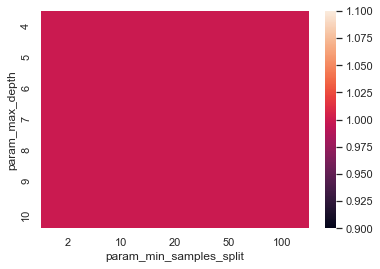

In [65]:
# Creamos el modelo
DecisionTree_model = DecisionTreeClassifier()

# Valores parámetro de profundidad máxima
max_depths = np.arange(4,11)

# Valores numero minimo de observaciones de una hoja de arbol
min_samples_split = [2, 10, 20, 50, 100]

# Agrupamos la rejilla que integrará todas las combinaciones posibles de hiperparámetros
param_grid = {'max_depth': max_depths, 'min_samples_split': min_samples_split}

# Entrenamos modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
grid_DT = GridSearchCV(estimator = DecisionTree_model,
                    param_grid = param_grid,
                    cv = 4,
                    return_train_score= True)

# Entrenamos los modelos
grid_DT.fit(train_X, train_y)

# Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado
print("Best cross-validation score:", grid_DT.best_score_)
print("Best parameters: ", grid_DT.best_params_)

# Representamos el heatmap creando un dataframe
print("Heatmap Decision Tree")
pvt_DT = pd.pivot_table(pd.DataFrame(grid_DT.cv_results_),
                     values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')
heatm_DT = sns.heatmap(pvt_DT)



print(pd.pivot_table(pd.DataFrame(grid_DT.cv_results_),
                     values=['mean_test_score','std_test_score'], index='param_max_depth', columns='param_min_samples_split'))

### Implementación

In [66]:
# Definimos el modelo con max_depth =5
model_tsne = DecisionTreeClassifier(max_depth = 4,  min_samples_split = 100).fit(train_X, train_y)

# Aplicamos validación cruzada

cross_val_tsne = cross_val_score(estimator = model_tsne, X = train_X, y = train_y, cv = 5)

print('Validación cruzada: {}'.format(cross_val_tsne))
print('La media de la validación cruzada es: {0: .3f}'.format(np.mean(cross_val_tsne)))
print('La desviación estándar de la validación cruzada es: {0: .3f}'.format(np.std(cross_val_tsne)))

Validación cruzada: [1. 1. 1. 1. 1.]
La media de la validación cruzada es:  1.000
La desviación estándar de la validación cruzada es:  0.000


### Evaluación

Precisión obtenida: 1.0


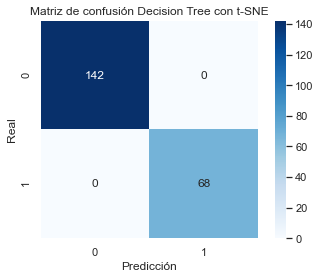

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score


# Generamos predicciones
predicted = model_tsne.predict(test_X)


# Generamos la matriz de confusión y calculamos la precisión
matrix = confusion_matrix(test_y, predicted)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted)))
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.title("Matriz de confusión Decision Tree con t-SNE")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## 3.2.2. KNN

### Optimización de parámetros

Best cross-validation score: 1.0
Best parameter :  {'n_neighbors': 1}
Heatmap k-nn.
                   mean_test_score  std_test_score
param_n_neighbors                                 
1                              1.0             0.0
2                              1.0             0.0
3                              1.0             0.0
4                              1.0             0.0
5                              1.0             0.0
6                              1.0             0.0
7                              1.0             0.0
8                              1.0             0.0
9                              1.0             0.0
10                             1.0             0.0


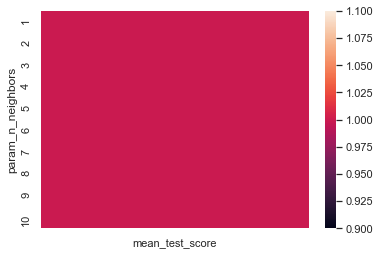

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Creamos el modelo
kNN_model = KNeighborsClassifier()
# Array con los valores para el número de vecinos, entre 1 y 10
ks = np.array(range(1,11))

# Agrupamos la "rejilla" que integrará todas las combinaciones posibles de hiperparámetros
param_grid = {'n_neighbors': ks}
# Entrenamos un modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
grid = GridSearchCV(estimator = kNN_model,
                    param_grid = param_grid,
                    cv = 4,
                    return_train_score=True)

# Entrenamos modelo
grid.fit(train_X, train_y)
# Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado

print("Best cross-validation score:", grid.best_score_)
print("Best parameter : ", grid.best_params_)
# Representamos el heatmap creando un dataframe
print("Heatmap k-nn.")
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
                     values='mean_test_score', index='param_n_neighbors')

heatm = sns.heatmap(pvt)

print(pd.pivot_table(pd.DataFrame(grid.cv_results_),
                     values=['mean_test_score','std_test_score'], index='param_n_neighbors'))

### Implementación

In [69]:
# Elegimos el mejor hiperparámetro encontrado: 7
knn = KNeighborsClassifier(n_neighbors = 7)

# Entrenamos el modelo
knn.fit(train_X, train_y)

# Realizamos una predicción
predicted_KNN =knn.predict(test_X)

### Evaluación

Precisión obtenida: 1.0


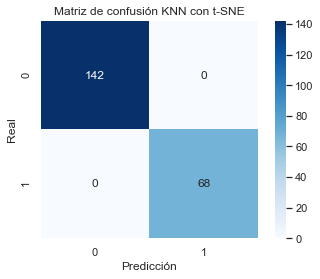

In [70]:
# Generamos la matriz de confusión y calculamos la precisión
matrix = confusion_matrix(test_y, predicted_KNN)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted_KNN)))
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("Predicción")
plt.title("Matriz de confusión KNN con t-SNE")
plt.ylabel("Real")
plt.show()

## 3.2.3. Naive-Bayes

### Implementación

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()

# Entrenamos el modelo
gnb.fit(train_X, train_y)

# Realizamos una predicción
predicted_NB =gnb.predict(test_X)

### Evaluación

Precisión obtenida: 0.9952380952380953


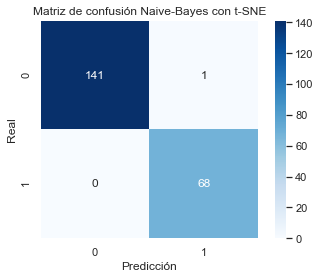

In [72]:
# Generamos la matriz de confusión y calculamos la precisión
matrix = confusion_matrix(test_y, predicted_NB)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted_NB)))
a =sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión Naive-Bayes con t-SNE")
plt.show()

## 3.2.4 SVM

### Optimización de parámetros

Best cross-validation score: 1.0
Best parameters:  {'C': 0.1, 'gamma': 0.01}
Heatmap SVM. Kernel radial
            mean_test_score                               std_test_score  \
param_gamma          0.001     0.010     1.000     10.000         0.001    
param_C                                                                    
0.01               0.993852  0.646225  0.646225  0.646225       0.010648   
0.10               0.977509  1.000000  0.646225  0.646225       0.012115   
1.00               1.000000  1.000000  0.952919  0.699387       0.000000   
10.00              1.000000  1.000000  0.954968  0.711649       0.000000   
50.00              1.000000  1.000000  0.954968  0.711649       0.000000   
100.00             1.000000  1.000000  0.954968  0.711649       0.000000   
200.00             1.000000  1.000000  0.954968  0.711649       0.000000   

                                          
param_gamma   0.010     1.000     10.000  
param_C                                   
0.01  

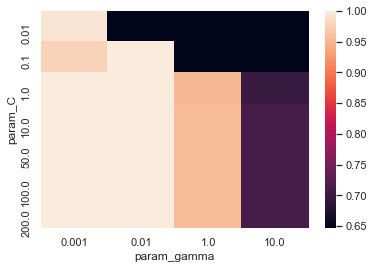

In [73]:
from sklearn.svm import SVC
# Radial
# Creamos el modelo
SVC_model_radial = SVC()

# Valores para el parámetro de regularización C
Cs = [0.01, 0.1, 1, 10, 50, 100, 200]
 
# Valores para el coeficiente gamma
gammas = [0.001, 0.01, 1, 10]

# Agrupamos la "rejilla" que integrará todas las combinaciones posibles de hiperparámetros
param_grid = {'C': Cs, 'gamma': gammas}
#Entrenamos un modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
grid_radial = GridSearchCV(estimator = SVC_model_radial,
                    param_grid = param_grid,
                    cv = 4,
                    return_train_score=True)

# Entrenamos los modelos
grid_radial.fit(train_X, train_y)

# Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado
print("Best cross-validation score:", grid_radial.best_score_)
print("Best parameters: ", grid_radial.best_params_)

# Representamos el heatmap creando un dataframe
print("Heatmap SVM. Kernel radial")
pvt_radial = pd.pivot_table(pd.DataFrame(grid_radial.cv_results_),
                     values='mean_test_score', index='param_C', columns='param_gamma')
heatm_radial = sns.heatmap(pvt_radial)



print(pd.pivot_table(pd.DataFrame(grid_radial.cv_results_),
                     values=['mean_test_score','std_test_score'], index='param_C', columns='param_gamma'))

### Implementación

In [74]:
# Elaboramos el mejor modelo obtenido en el ajuste de kernel radial
SVC_model_radial_fit = SVC(kernel = 'rbf', C = 100, gamma = 0.001)

# Entrenamos el modelo
SVC_model_radial_fit.fit(train_X, train_y)

# Realizamos una predicción
predicted_SVM= SVC_model_radial_fit.predict(test_X)

### Evaluación

Precisión obtenida: 1.0


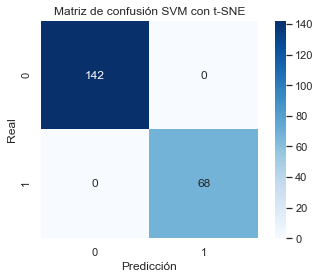

In [75]:
# Generamos la matriz de confusión y calculamos la precisión
matrix = confusion_matrix(test_y, predicted_SVM)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted_SVM)))
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión SVM con t-SNE")
plt.show()

## 3.3. UMAP

*Uniform Manifold Approximation and Projection for Dimension Reduction (UMAP)*

In [76]:
# Separamos los datos entre el conjunto de test y train
train_X, test_X, train_y, test_y = train_test_split(df_features, target, test_size = 0.3)

C:\Users\sanch\anaconda3\envs\uoc20202pec4\lib\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11103. The TBB threading layer is disabled.
  warnings.warn(problem)


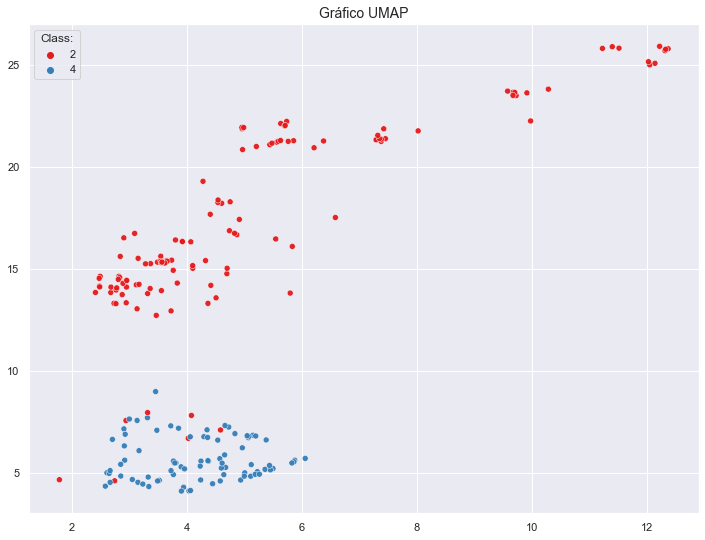

In [77]:
# UMAP para la reducción de dimensionalidad
import umap

model = umap.UMAP(n_components=2, random_state=42).fit(train_X)

X_train_projection = model.transform(train_X)
X_test_projection = model.transform(test_X)


plt.figure(figsize = (12, 9))
p = sns.scatterplot(
    x = X_test_projection[:,0], y = X_test_projection[:,1],
    hue = test_y,
    palette = "Set1",
    data = test_X,
    legend = "full",
    alpha = 0.95)

p.set_title('Gráfico UMAP', size=14)
plt.show()


## 3.3.1. Decision Tree

### Optimización de parámetros

Best cross-validation score: 0.9713281354125016
Best parameters:  {'max_depth': 4, 'min_samples_split': 10}
Heatmap Decision Tree
                        mean_test_score                                \
param_min_samples_split             2         10        20        50    
param_max_depth                                                         
4                              0.959033  0.971328  0.967230  0.971328   
5                              0.959050  0.967246  0.971311  0.971328   
6                              0.952902  0.967246  0.969262  0.971328   
7                              0.959050  0.969296  0.969262  0.971328   
8                              0.954951  0.969296  0.971311  0.971328   
9                              0.954951  0.969296  0.969262  0.971328   
10                             0.952902  0.969296  0.969262  0.971328   

                                  std_test_score                      \
param_min_samples_split       100            2         10        20

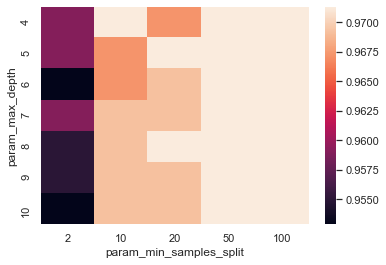

In [78]:
# Creamos el modelo
DecisionTree_model = DecisionTreeClassifier()

# Valores parámetro de profundidad máxima
max_depths = np.arange(4,11)

# Valores numero minimo de observaciones de una hoja de arbol
min_samples_split = [2, 10, 20, 50, 100]

# Agrupamos la rejilla que integrará todas las combinaciones posibles de hiperparámetros
param_grid = {'max_depth': max_depths, 'min_samples_split': min_samples_split}

# Entrenamos modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
grid_DT = GridSearchCV(estimator = DecisionTree_model,
                    param_grid = param_grid,
                    cv = 4,
                    return_train_score= True)

# Entrenamos los modelos
grid_DT.fit(X_train_projection, train_y)

# Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado
print("Best cross-validation score:", grid_DT.best_score_)
print("Best parameters: ", grid_DT.best_params_)

# Representamos el heatmap creando un dataframe
print("Heatmap Decision Tree")
pvt_DT = pd.pivot_table(pd.DataFrame(grid_DT.cv_results_),
                     values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')
heatm_DT = sns.heatmap(pvt_DT)



print(pd.pivot_table(pd.DataFrame(grid_DT.cv_results_),
                     values=['mean_test_score','std_test_score'], index='param_max_depth', columns='param_min_samples_split'))

### Implementación

In [79]:
# Elaboramos el mejor modelo obtenido en el ajuste de hiperparámetros
Tree_model = DecisionTreeClassifier(max_depth = 4, min_samples_split = 10)

# Entrenamos el modelo
Tree_model.fit(X_train_projection, train_y)

# Realizamos una predicción
predicted_tree= Tree_model.predict(X_test_projection)

### Evaluación

Precisión obtenida: 0.9523809523809523


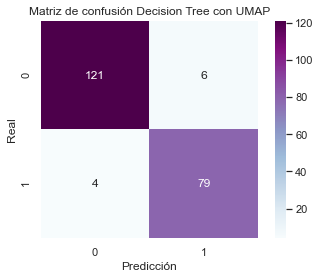

In [80]:
# Generamos la matriz de confusión y calculamos la precisión
matrix = confusion_matrix(test_y, predicted_tree)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted_tree)))
sns.heatmap(matrix, annot=True, fmt="d", cmap='BuPu', square=True)
plt.title("Matriz de confusión Decision Tree con UMAP")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## 3.3.2. KNN

### Optimización de parámetros

Best cross-validation score: 0.9774756763961082
Best parameter :  {'n_neighbors': 7}
Heatmap k-nn.
                   mean_test_score  std_test_score
param_n_neighbors                                 
1                         0.961116        0.014683
2                         0.959066        0.011663
3                         0.975426        0.015352
4                         0.975426        0.015352
5                         0.973377        0.014655
6                         0.967246        0.013002
7                         0.977476        0.012143
8                         0.975443        0.010066
9                         0.977476        0.012143
10                        0.977476        0.012143


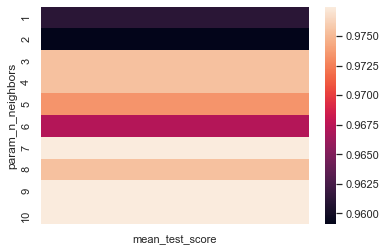

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Creamos el modelo
kNN_model = KNeighborsClassifier()
# Array con los valores para el número de vecinos, entre 1 y 10
ks = np.array(range(1,11))

# Agrupamos la "rejilla" que integrará todas las combinaciones posibles de hiperparámetros
param_grid = {'n_neighbors': ks}
# Entrenamos un modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
grid = GridSearchCV(estimator = kNN_model,
                    param_grid = param_grid,
                    cv = 4,
                    return_train_score=True)

# Entrenamos modelo
grid.fit(X_train_projection, train_y)
# Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado

print("Best cross-validation score:", grid.best_score_)
print("Best parameter : ", grid.best_params_)
# Representamos el heatmap creando un dataframe
print("Heatmap k-nn.")
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
                     values='mean_test_score', index='param_n_neighbors')

heatm = sns.heatmap(pvt)

print(pd.pivot_table(pd.DataFrame(grid.cv_results_),
                     values=['mean_test_score','std_test_score'], index='param_n_neighbors'))

### Implementación

In [82]:
knn = KNeighborsClassifier(n_neighbors = 4)

# Entrenamos el modelo
knn.fit(X_train_projection, train_y)

# Realizamos una predicción
predicted_KNN=knn.predict(X_test_projection)

### Evaluación

Precisión obtenida: 0.9619047619047619


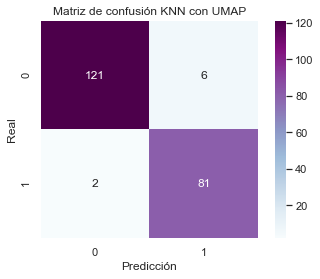

In [83]:
# Generamos la matriz de confusión y calculamos la precisión
matrix_knn_umap = confusion_matrix(test_y, predicted_KNN)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted_KNN)))
sns.heatmap(matrix_knn_umap, annot=True, fmt="d", cmap='BuPu', square=True)
plt.xlabel("Predicción")
plt.title("Matriz de confusión KNN con UMAP")
plt.ylabel("Real")
plt.show()

## 3.3.3. Naive-Bayes

### Implementación

In [84]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()

# Entrenamos el modelo
gnb.fit(X_train_projection, train_y)

# Realizamos una predicción
predicted_NB=gnb.predict(X_test_projection)

### Evaluación

Precisión obtenida: 0.9666666666666667


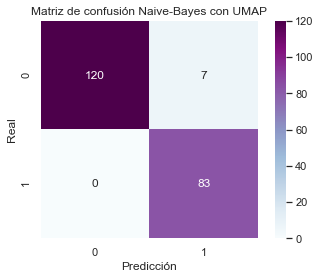

In [85]:
# Generamos la matriz de confusión y calculamos la precisión
matrix_NB_umap = confusion_matrix(test_y, predicted_NB)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted_NB)))
a =sns.heatmap(matrix_NB_umap, annot=True, fmt="d", cmap='BuPu', square=True)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión Naive-Bayes con UMAP")
plt.show()

## 3.3.4 SVM

### Optimización de parámetros

Best cross-validation score: 0.9774756763961082
Best parameters:  {'C': 0.01, 'gamma': 0.01}
Heatmap SVM. Kernel radial
            mean_test_score                               std_test_score  \
param_gamma          0.001     0.010     1.000     10.000         0.001    
param_C                                                                    
0.01               0.676896  0.977476  0.676896  0.676896       0.003559   
0.10               0.977476  0.977476  0.977476  0.683027       0.012143   
1.00               0.977476  0.977476  0.977476  0.971345       0.012143   
10.00              0.977476  0.977476  0.975426  0.957034       0.012143   
50.00              0.977476  0.977476  0.967246  0.948870       0.012143   
100.00             0.977476  0.977476  0.965197  0.946838       0.012143   
200.00             0.977476  0.977476  0.965197  0.946855       0.012143   

                                           
param_gamma    0.010     1.000     10.000  
param_C                        

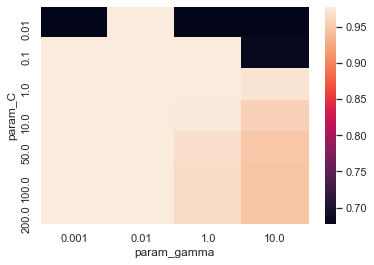

In [86]:
from sklearn.svm import SVC
# Radial
# Creamos el modelo
SVC_model_radial = SVC()

# Valores para el parámetro de regularización C
Cs = [0.01, 0.1, 1, 10, 50, 100, 200]
 
# Valores para el coeficiente gamma
gammas = [0.001, 0.01, 1, 10]

# Agrupamos la "rejilla" que integrará todas las combinaciones posibles de hiperparámetros
param_grid = {'C': Cs, 'gamma': gammas}
#Entrenamos un modelo para cada combinación posible de hiperparámetros con 4 particiones estratificadas (cv = 4)
grid_radial = GridSearchCV(estimator = SVC_model_radial,
                    param_grid = param_grid,
                    cv = 4,
                    return_train_score=True)

# Entrenamos los modelos
grid_radial.fit(X_train_projection, train_y)

# Mostramos el mejor resultado de validación cruzada y los hiperparámetros que lo han generado
print("Best cross-validation score:", grid_radial.best_score_)
print("Best parameters: ", grid_radial.best_params_)

# Representamos el heatmap creando un dataframe
print("Heatmap SVM. Kernel radial")
pvt_radial = pd.pivot_table(pd.DataFrame(grid_radial.cv_results_),
                     values='mean_test_score', index='param_C', columns='param_gamma')
heatm_radial = sns.heatmap(pvt_radial)



print(pd.pivot_table(pd.DataFrame(grid_radial.cv_results_),
                     values=['mean_test_score','std_test_score'], index='param_C', columns='param_gamma'))

### Implementación

In [87]:
# Elaboramos el mejor modelo obtenido en el ajuste de kernel radial
SVC_model_radial_fit = SVC(kernel = 'rbf', C =50, gamma = 1)

# Entrenamos el modelo
SVC_model_radial_fit.fit(X_train_projection, train_y)

# Realizamos una predicción
predicted_SVM = SVC_model_radial_fit.predict(X_test_projection)

### Evaluación

Precisión obtenida: 0.9571428571428572


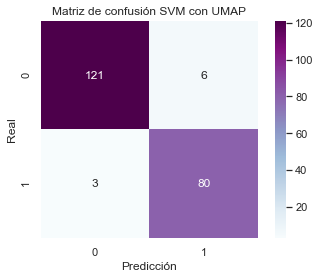

In [88]:
# Generamos la matriz de confusión y calculamos la precisión
matrix = confusion_matrix(test_y, predicted_SVM)
print("Precisión obtenida: {}".format(accuracy_score(test_y, predicted_SVM)))
sns.heatmap(matrix, annot=True, fmt="d", cmap='BuPu', square=True)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión SVM con UMAP")
plt.show()

# Referencias:

1. Visualizing data using t-SNE [PDF].
Maaten, L.v.d. and Hinton, G., 2008. Journal of Machine Learning Research, Vol 9(Nov), pp. 2579—2605.